In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import skill_metrics as sm
from matplotlib import pyplot as plt
import tkinter 
import scipy as sp
from scipy import stats
gauge = pd.read_csv('saltpond_2001_2016.csv')
gpm = pd.read_csv('saltpond_img.csv')
chirps = pd.read_csv('saltpond_chirps.csv')

In [6]:
slpd_img = pd.DataFrame([gpm.precipitationCal, gauge.value])
slpd_chirps = pd.DataFrame([chirps.precip, gauge.value])

In [14]:
slpd_img = slpd_img.T
slpd_chirps = slpd_chirps.T

In [18]:
slpd_img = slpd_img.dropna()
slpd_chirps = slpd_chirps.dropna()

In [20]:
slpd_imerg = slpd_img.iloc[:,0]
slpd_gmt  = slpd_img.iloc[:,1]

slpd_chps = slpd_chirps.iloc[:,0]
slpd_gauge = slpd_img.iloc[:,1]

In [21]:
slpdcor_img = stats.pearsonr(slpd_imerg,slpd_gmt)
slpdcor_chirps = stats.pearsonr(slpd_chps,slpd_gauge)

In [22]:
slpdmean_img = sum((slpd_imerg-slpd_gmt)**2)/len(slpd_imerg)
slpdmean_chirps = sum((slpd_chps-slpd_gauge)**2)/len(slpd_chirps)

In [23]:
slpdrmse_img = np.sqrt(slpdmean_img)
slpdrmse_chirps = np.sqrt(slpdmean_chirps)

# slpdbias_img = sum(slpd_imerg-slpd_gmt)/len(slpd_imerg)
slpdbias_chirps = sum(slpd_chps-slpd_gauge)/len(slpd_chirps)

In [25]:
slpdstd_img = np.std(slpd_imerg)
slpdstd_chirps = np.std(slpd_chps)

In [26]:
slpdgauge = np.std(gauge['value'])

In [27]:
slpd_cor = [1,slpdcor_img[0], slpdcor_chirps[0]]
slpd_rmse = [0,slpdrmse_img, slpdrmse_chirps]
slpd_bias = [slpdbias_img, slpdbias_chirps]
slpd_std = [slpdgauge,slpdstd_img, slpdstd_chirps]
label = ['GMET','IMERG','CHIRPS']
numberArray = np.array(([1.1,2.2,3.3],[4.4,5.5,6.6]))

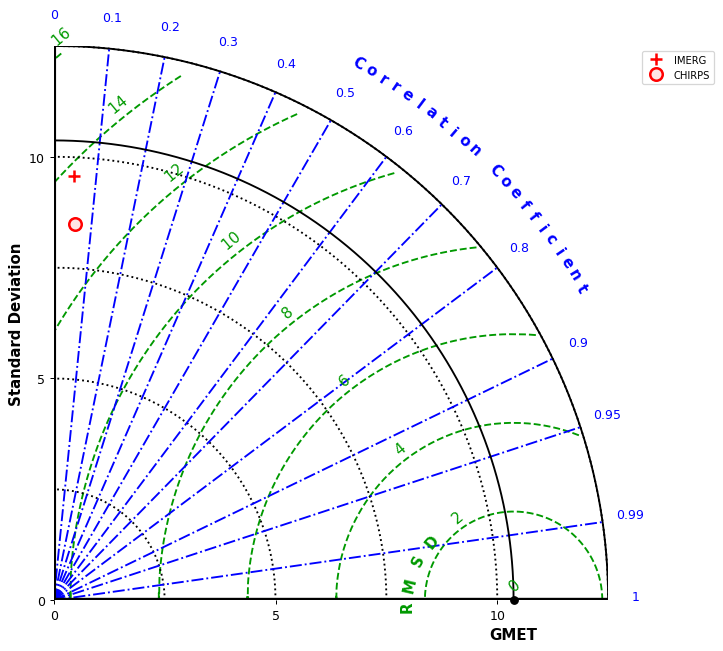

In [28]:
fig1 = plt.figure(figsize=(10,8),dpi=90)

sdev = np.array(slpd_std)
crmsd = np.array(slpd_rmse)
ccoef = np.array(slpd_cor)
rms = np.arange(0,18,2)

fig1=sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'GMET',alpha=0.1)